In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 28.3 MB/s 
     |████████████████████████████████| 4.7 MB 49.6 MB/s 
     |████████████████████████████████| 365 kB 69.5 MB/s 
     |████████████████████████████████| 1.3 MB 57.6 MB/s 
     |████████████████████████████████| 115 kB 71.9 MB/s 
     |████████████████████████████████| 212 kB 67.8 MB/s 
     |████████████████████████████████| 141 kB 75.6 MB/s 
     |████████████████████████████████| 101 kB 11.5 MB/s 
     |████████████████████████████████| 596 kB 73.7 MB/s 
     |████████████████████████████████| 127 kB 71.0 MB/s 
     |████████████████████████████████| 6.6 MB 58.0 MB/s 
Mounted at /content/gdrive


In [1]:
import fastai
fastai.__version__

'2.7.9'

In [2]:
from fastai import *
from fastai.vision import *
from fastbook import *

path = "/content/gdrive/MyDrive/Machine_Learning/classific_of_maize_diseases"

data = DataBlock(blocks = (ImageBlock, CategoryBlock), 
                 get_items = get_image_files, 
                 get_y = parent_label,
                 splitter = RandomSplitter(),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size = 224))
dls = data.dataloaders(path)


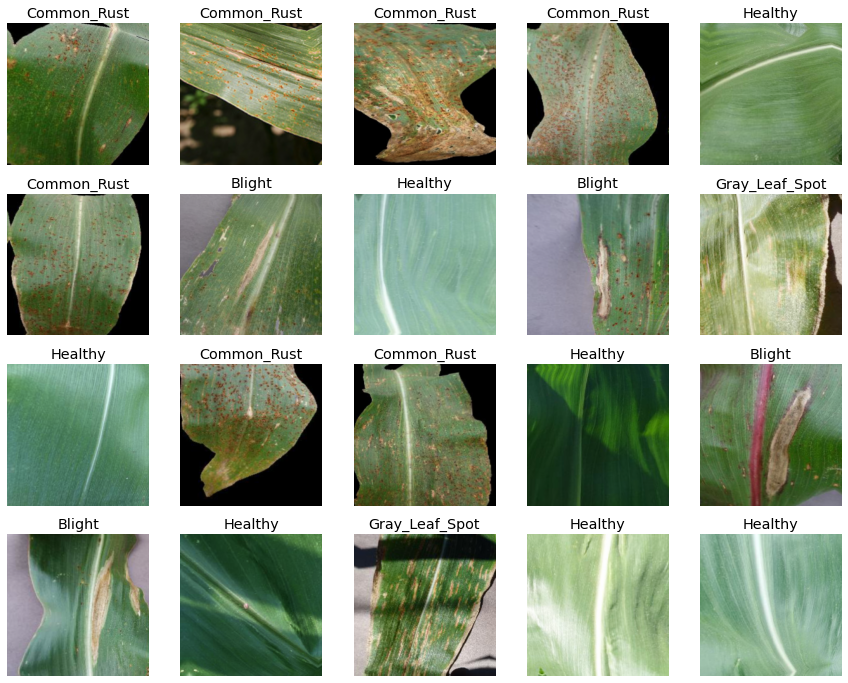

In [3]:
dls.show_batch(max_n = 20)

In [4]:
learn = vision_learner(dls, resnet152, metrics = accuracy)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0006918309954926372)

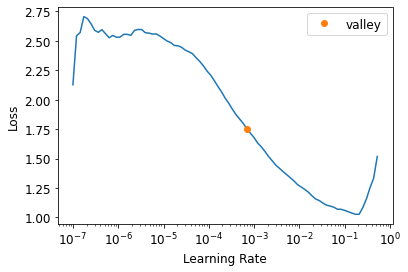

In [6]:
learn.lr_find()

In [7]:
learn.fine_tune(10, 0.0006918309954926372)

epoch,train_loss,valid_loss,accuracy,time
0,0.667104,0.263536,0.915173,05:23


epoch,train_loss,valid_loss,accuracy,time
0,0.271516,0.178890,0.936679,01:46
1,0.195450,0.171104,0.945042,01:45
2,0.161577,0.174277,0.943847,01:45
3,0.126015,0.194166,0.948626,01:45
4,0.089739,0.189382,0.946237,01:45
5,0.066565,0.196384,0.952210,01:45
6,0.048081,0.163596,0.955795,01:45
7,0.041572,0.178257,0.953405,01:45
8,0.030795,0.149475,0.961768,01:46
9,0.026843,0.151263,0.961768,01:45


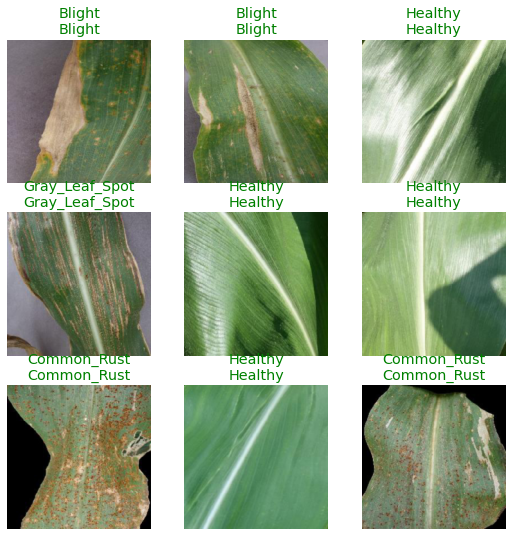

In [9]:
learn.show_results()

In [10]:
interp = Interpretation.from_learner(learn)

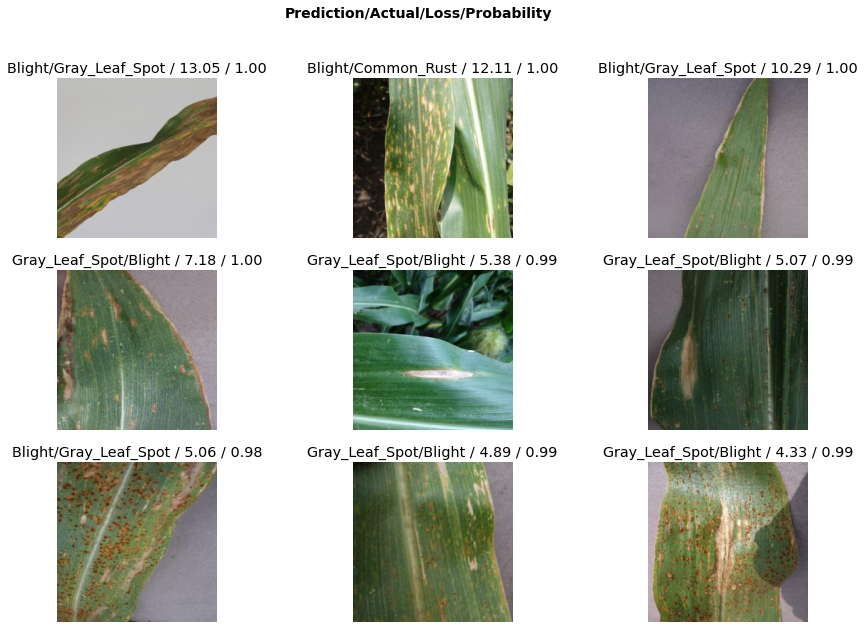

In [11]:
interp.plot_top_losses(9, figsize = (15,10))

In [12]:
!pip install jmd_imagescraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 37.9 MB/s 


In [ ]:
from jmd_imagescraper.imagecleaner import *

display_image_cleaner(path)

In [14]:
learn.path = Path('.')
learn.export()

In [15]:
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

In [16]:
learn_inf = load_learner(path/'export.pkl')

In [17]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 26.1 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 57 kB 4.5 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 212 kB 74.1 MB/s 
     |████████████████████████████████| 275 kB 72.9 MB/s 
     |████████████████████████████████| 2.3 MB 55.3 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 10.1 MB/s 
     |████████████████████████████████| 68 kB 7.2 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 856 kB 64.1 MB/s 
     |████████████████████████████████| 4.1 MB 4.6 MB/s 
     |████████████████████████████████| 62 kB 974

In [18]:
import gradio as gr
labels = ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn_inf.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [19]:
gr_interface = gr.Interface(fn = predict, inputs = gr.inputs.Image(shape = (512, 512)), outputs = gr.outputs.Label(num_top_classes = len(labels)), interpretation = "default")
gr_interface.launch()

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://11036.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f1c5cd61dd0>,
 'http://127.0.0.1:7860/',
 'https://11036.gradio.app')

In [ ]:
!git clone https://huggingface.co/spaces/Mwebrania/wizard

Cloning into 'wizard'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


In [ ]:
!git add classification of diseases in maize.ipynb
!git commit -m "Add app file"
!git push

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
